In [97]:
# Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from yellowbrick.cluster import SilhouetteVisualizer

In [62]:
d=pd.read_excel('cust_data.xlsx')

In [27]:
d

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [29]:
d.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [30]:
d.isna().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [31]:
d[d.duplicated()]

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft


In [32]:
d.value_counts('Gender')

Gender
F    22054
M     5222
dtype: int64

In [33]:
d['Gender'].mode()

0    F
Name: Gender, dtype: object

In [34]:
d['Gender'].fillna('Other', inplace=True)

In [35]:
d['Gender']

0            M
1            F
2            M
3            F
4        Other
         ...  
29995        M
29996        M
29997        M
29998        M
29999        F
Name: Gender, Length: 30000, dtype: object

In [36]:
d.value_counts('Gender')

Gender
F        22054
M         5222
Other     2724
dtype: int64

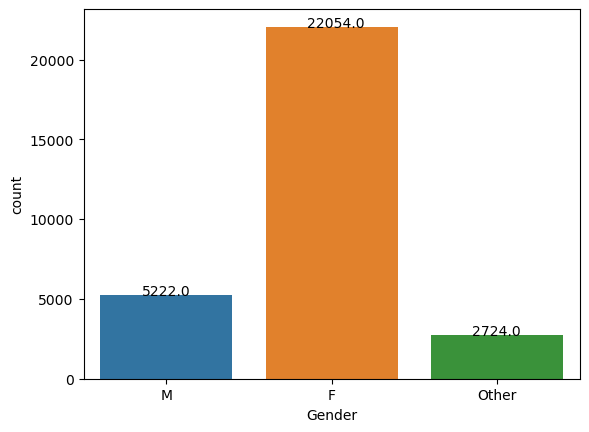

In [37]:
a=sns.countplot(d,x='Gender')
for p in a.patches:
   a.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.25))

<Axes: xlabel='Orders', ylabel='count'>

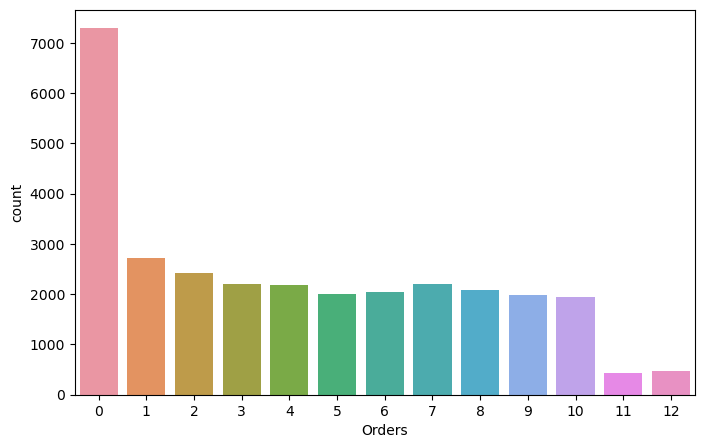

In [38]:
plt.figure(figsize=(8,5))
sns.countplot(data=d, x='Orders')

<Axes: xlabel='Orders', ylabel='count'>

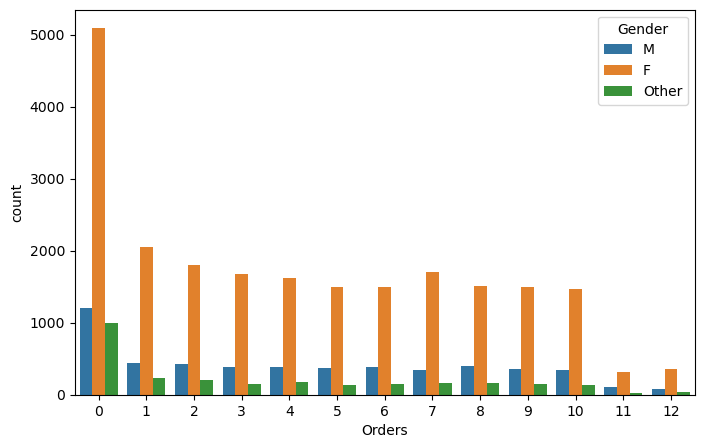

In [39]:
plt.figure(figsize=(8,5))
sns.countplot(data=d, x='Orders',hue='Gender')

C:\Users\Kaviyaa R\AppData\Local\Temp\ipykernel_6112\990000216.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(d.corr())


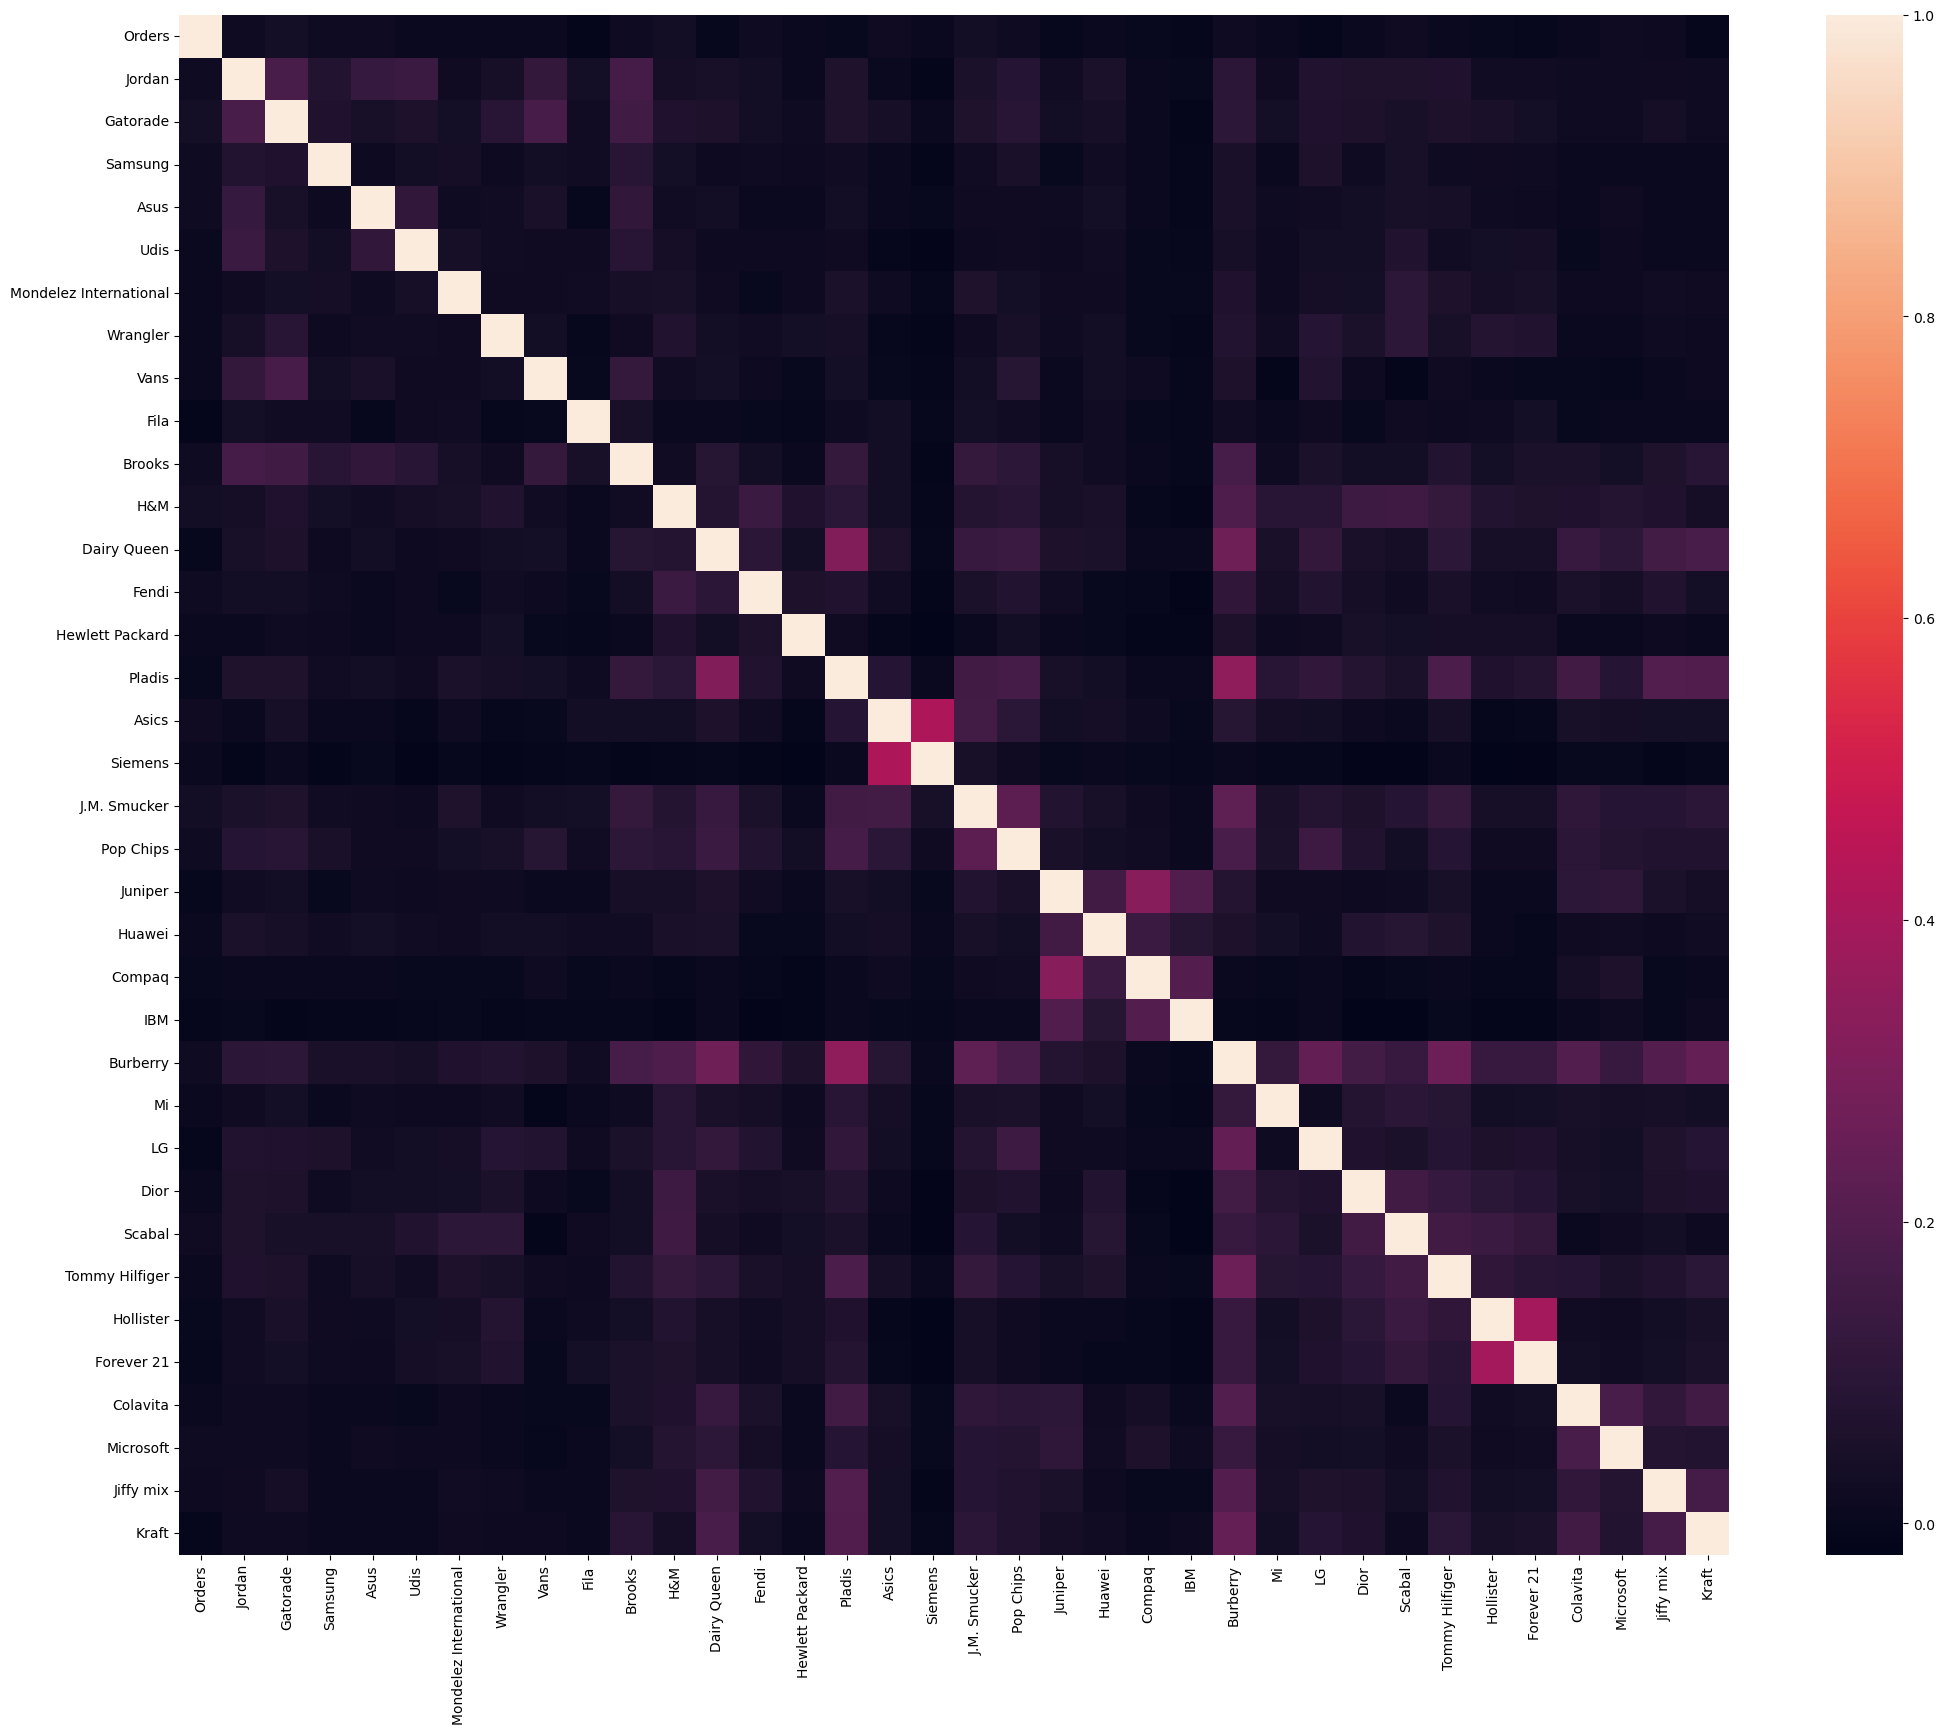

In [63]:
d=d.drop(columns=['Cust_ID'],axis=1)
plt.figure(figsize=(25,20))
sns.heatmap(d.corr())
plt.show()

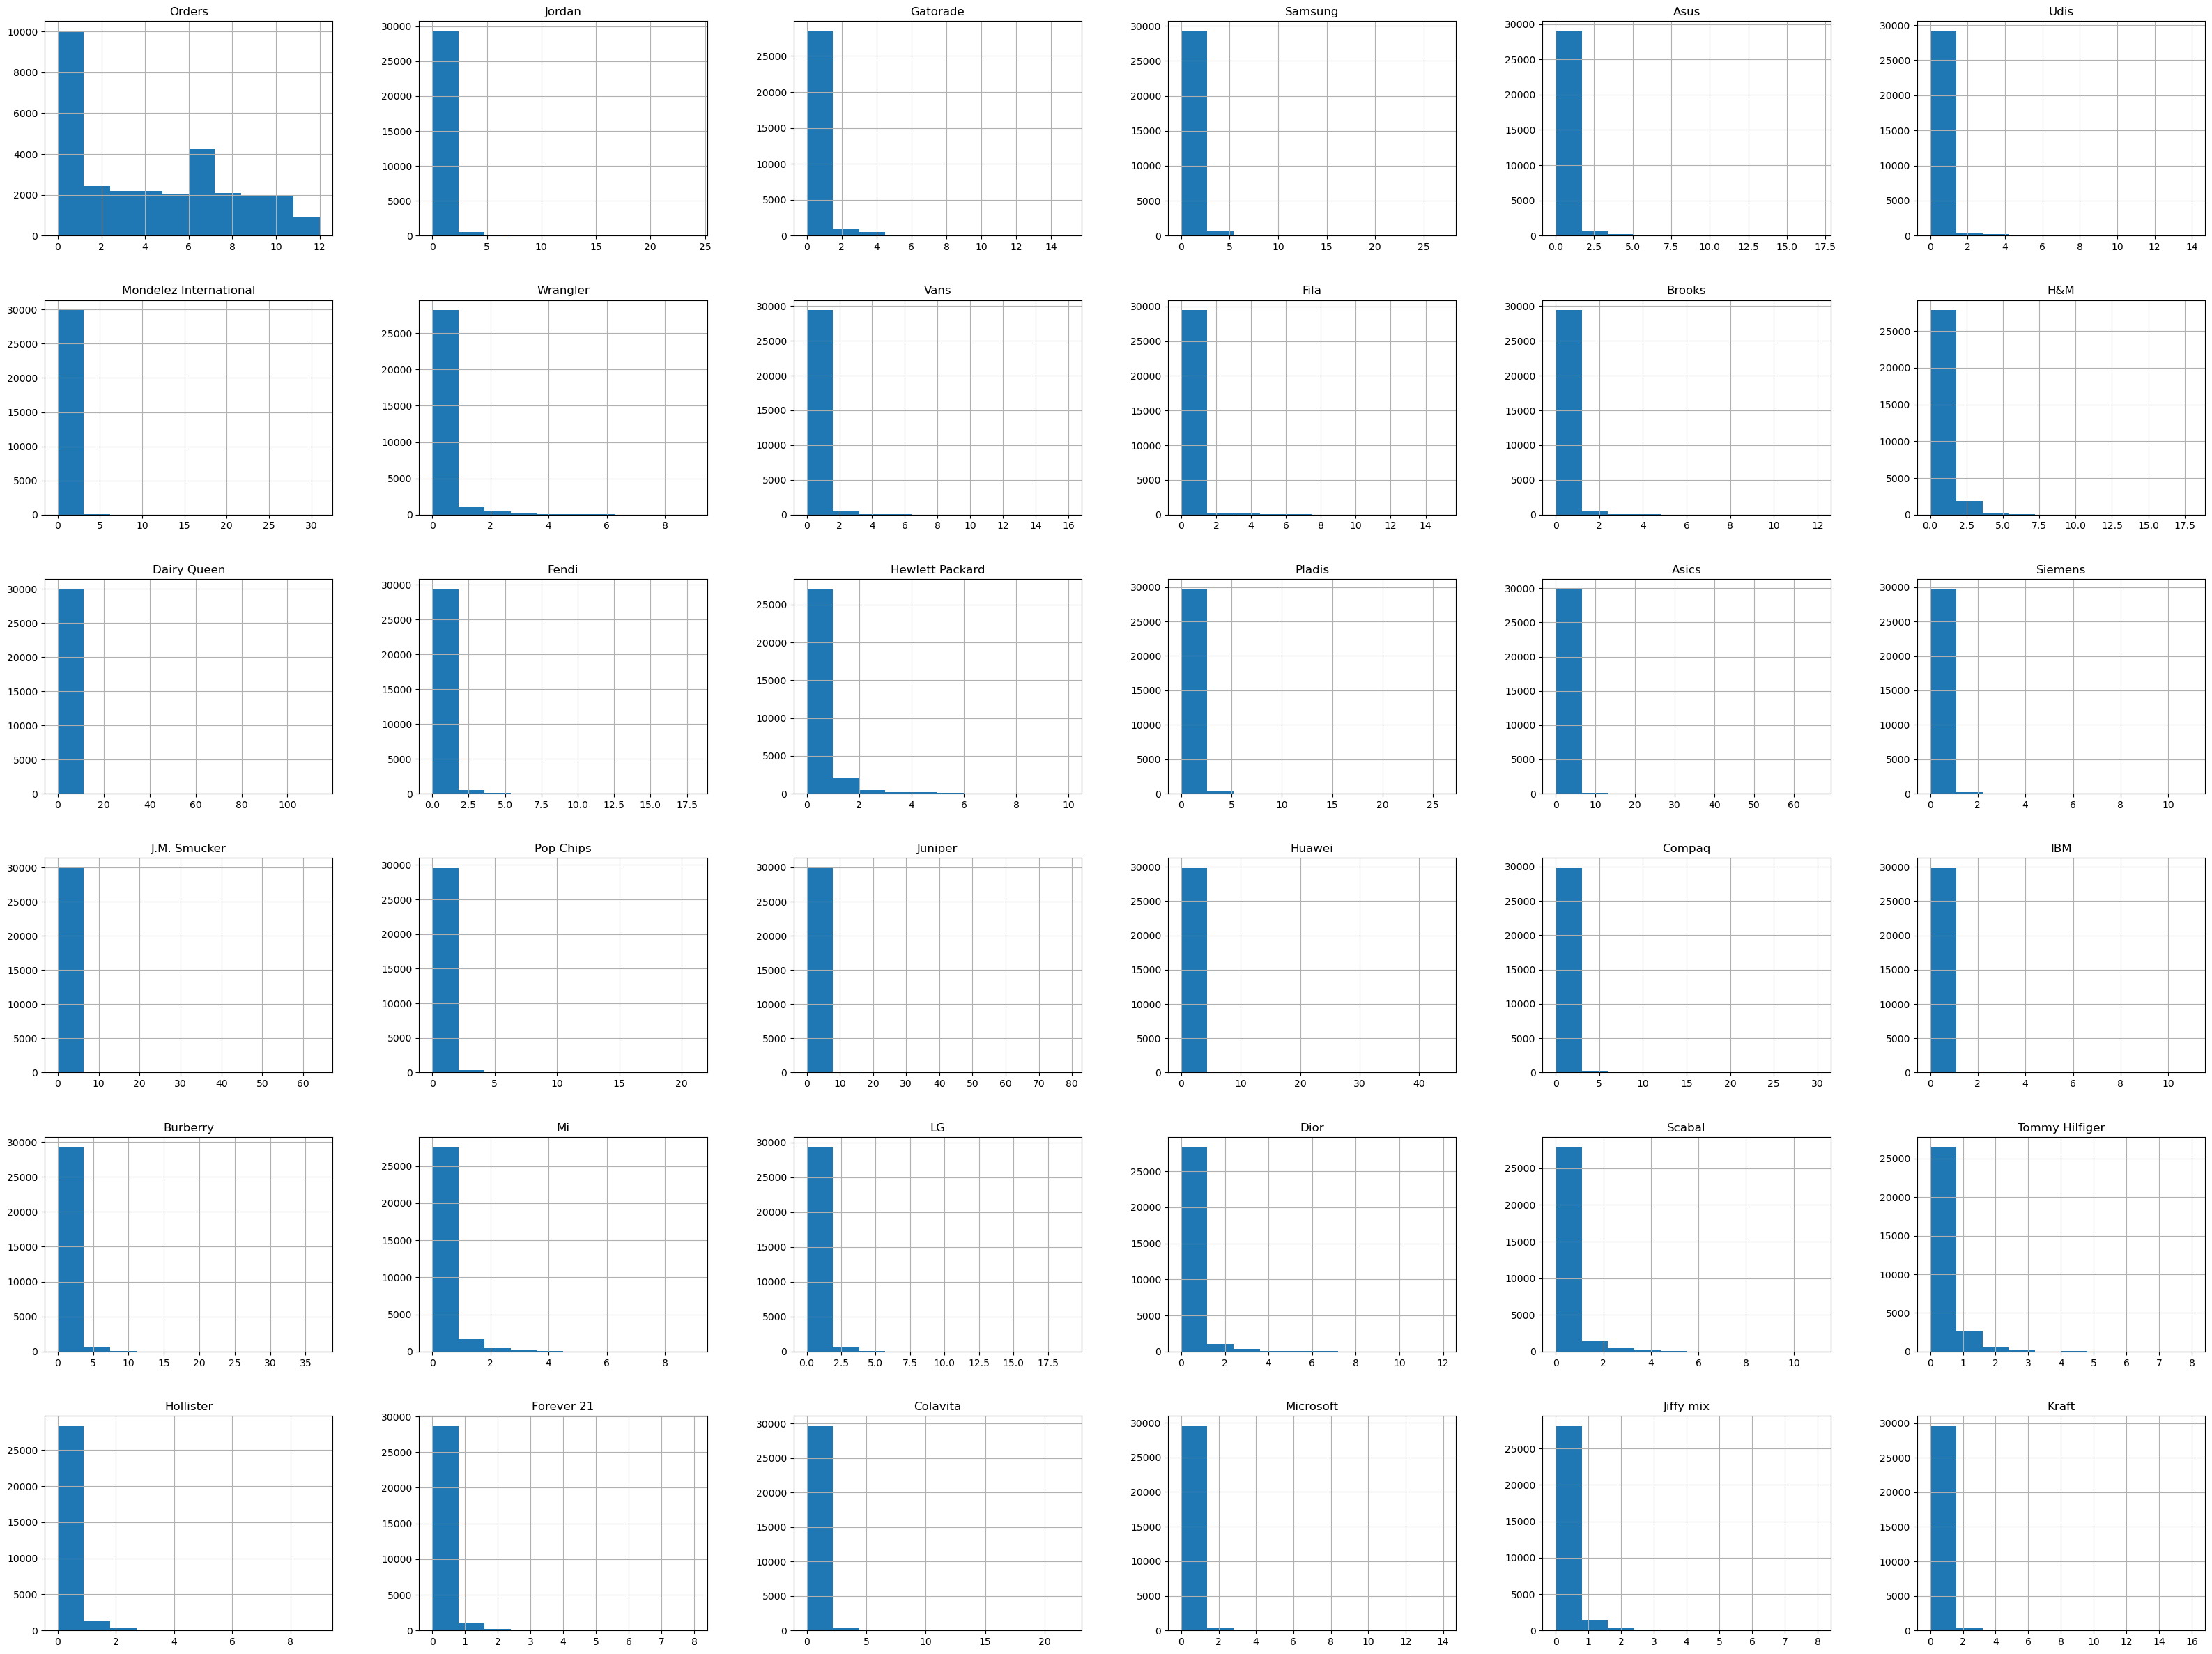

In [65]:
d.hist(figsize=(40,30))
plt.show()

In [71]:
d.columns

Index(['Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft'],
      dtype='object')

In [72]:
d.shape

(30000, 37)

In [73]:
d1 = pd.get_dummies(d, drop_first=False)

In [74]:
d1.columns

Index(['Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft', 'Gender_F',
       'Gender_M'],
      dtype='object')

In [75]:
d1.shape

(30000, 38)

In [76]:
d1.describe(percentiles = [0.01,0.25,0.5,0.75,0.95,0.99]).T

,count,mean,std,min,1%,25%,50%,75%,95%,99%,max
Orders,30000.0,4.169800,3.590311,0.0,0.0,1.0,4.0,7.0,10.0,12.0,12.0
Jordan,30000.0,0.267433,0.804778,0.0,0.0,0.0,0.0,0.0,2.0,4.0,24.0
Gatorade,30000.0,0.252333,0.705368,0.0,0.0,0.0,0.0,0.0,2.0,3.0,15.0
Samsung,30000.0,0.222933,0.917494,0.0,0.0,0.0,0.0,0.0,1.0,5.0,27.0
Asus,30000.0,0.161333,0.740038,0.0,0.0,0.0,0.0,0.0,1.0,4.0,17.0
Udis,30000.0,0.143533,0.641258,0.0,0.0,0.0,0.0,0.0,1.0,3.0,14.0
Mondelez International,30000.0,0.139767,0.525840,0.0,0.0,0.0,0.0,0.0,1.0,2.0,31.0
Wrangler,30000.0,0.106933,0.515921,0.0,0.0,0.0,0.0,0.0,1.0,3.0,9.0
Vans,30000.0,0.111433,0.547990,0.0,0.0,0.0,0.0,0.0,1.0,2.0,16.0
Fila,30000.0,0.094267,0.531592,0.0,0.0,0.0,0.0,0.0,1.0,3.0,15.0


In [77]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    return x

In [78]:
d2 = d1.apply(lambda x : outlier_capping(x))

In [79]:
d2.describe(percentiles = [0.01,0.25,0.5,0.75,0.95,0.99]).T

,count,mean,std,min,1%,25%,50%,75%,95%,99%,max
Orders,30000.0,4.169800,3.590311,0.0,0.0,1.0,4.0,7.0,10.0,12.0,12.0
Jordan,30000.0,0.252933,0.684086,0.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0
Gatorade,30000.0,0.236633,0.602647,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0
Samsung,30000.0,0.203533,0.737106,0.0,0.0,0.0,0.0,0.0,1.0,5.0,5.0
Asus,30000.0,0.143133,0.573693,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0
Udis,30000.0,0.123667,0.471643,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0
Mondelez International,30000.0,0.125333,0.393400,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
Wrangler,30000.0,0.096733,0.424714,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0
Vans,30000.0,0.088000,0.349180,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
Fila,30000.0,0.081333,0.389260,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0


In [80]:
d2.shape

(30000, 38)

In [81]:
d2.columns

Index(['Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft', 'Gender_F',
       'Gender_M'],
      dtype='object')

In [92]:
def myKmeans(data,k, verbose=True, grp=True):
    wcss=[]           #within cluster sum of squares
    cluster=[]
    for i in range(1,k+1):
        cluster.append(i)
        km=KMeans(n_clusters=i)
        km_result=km.fit(data)
        intr=km_result.inertia_
        wcss.append(intr)
        if verbose:
            print(f"for cluster {i} ; WCSS = {round(intr, 2)}")
    if grp:
        plt.plot(cluster, wcss, label="within cluster sum of sqaure(wcss)")
        plt.xlabel("Clusters")
        plt.ylabel("Wcss")
        plt.legend()
        plt.show()
    return wcss, cluster

C:\Users\Kaviyaa R\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for cluster 1 ; WCSS = 719739.46


C:\Users\Kaviyaa R\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for cluster 2 ; WCSS = 417841.25


C:\Users\Kaviyaa R\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for cluster 3 ; WCSS = 369522.04


C:\Users\Kaviyaa R\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for cluster 4 ; WCSS = 352946.81


C:\Users\Kaviyaa R\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for cluster 5 ; WCSS = 338691.78


C:\Users\Kaviyaa R\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for cluster 6 ; WCSS = 330320.7


C:\Users\Kaviyaa R\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for cluster 7 ; WCSS = 323288.44


C:\Users\Kaviyaa R\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for cluster 8 ; WCSS = 316291.87


C:\Users\Kaviyaa R\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for cluster 9 ; WCSS = 310126.82


C:\Users\Kaviyaa R\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for cluster 10 ; WCSS = 304754.74


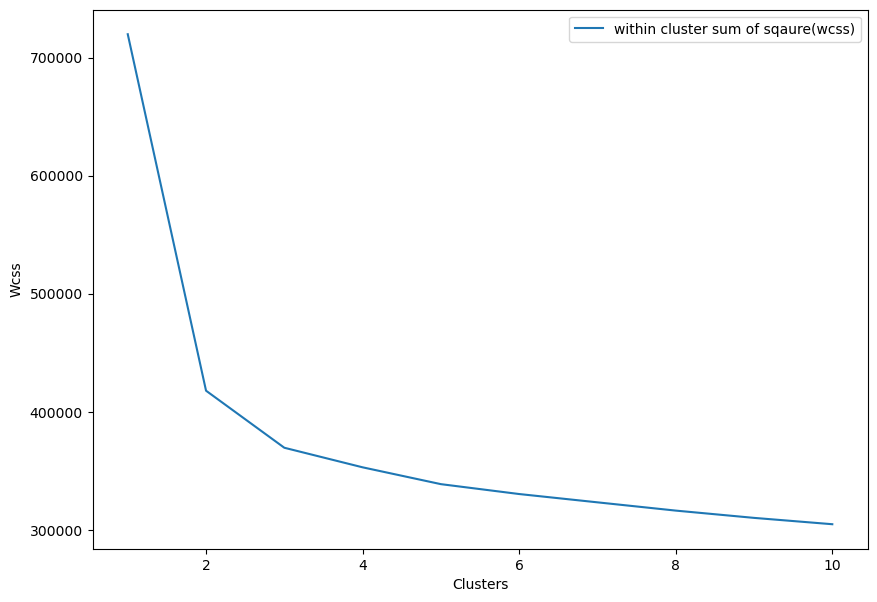

([719739.4580666656,
  417841.2524916881,
  369522.03650552774,
  352946.80974966,
  338691.77671595983,
  330320.69682817557,
  323288.44458468317,
  316291.86754595826,
  310126.82146661484,
  304754.7366647192],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [93]:
plt.figure(figsize = [10,7])
myKmeans(data=d2, k=10, verbose=True)

Error in callback <function _draw_all_if_interactive at 0x00000048A69B7640> (for post_execute):



KeyboardInterrupt



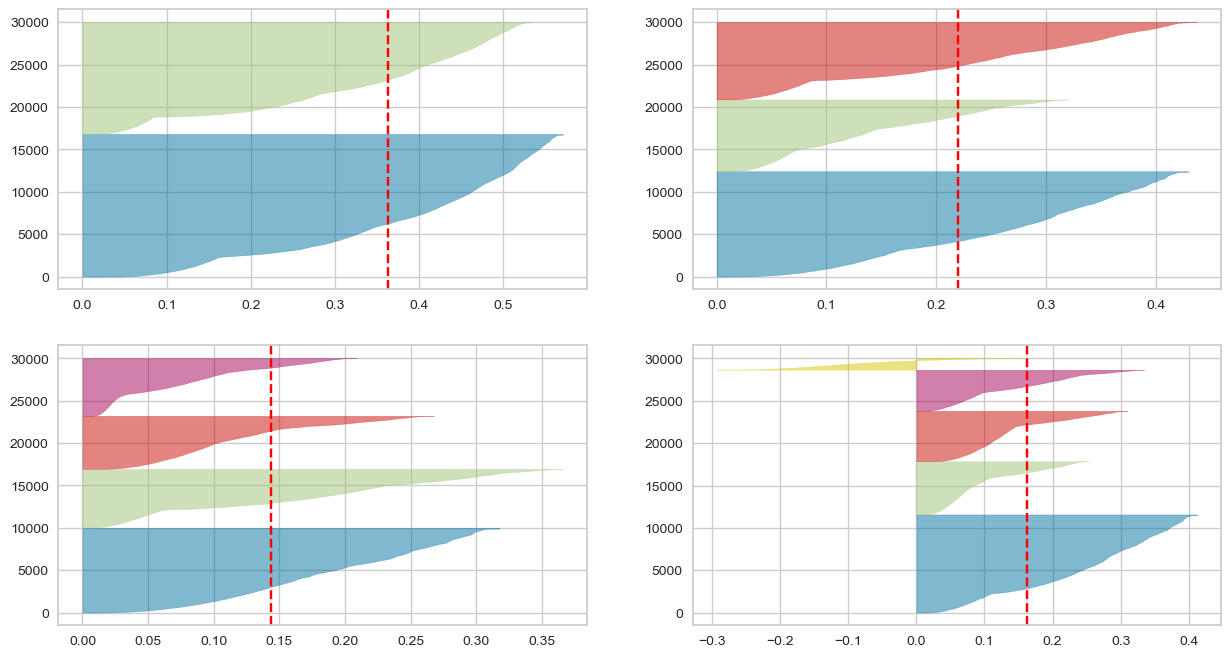

In [99]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
 
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(d2) 